In [180]:
import os,struct

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [181]:
BASE_PATH = './data/etl7'
UNPACK_STRING = '>H2sH6BI4H4B4x2016s4x'
FILES = ['ETL7LC_1']
RECORDS_NB = [9600, 7200, 9600, 7200]
RECORD_LENGTH = 2052 # bytes
WIDTH = 64
HEIGHT = 63
COLUMNS_LABELS = ['index','character_name','phonetic','writer_gender','writer_age','date_of_scan','image_data']
MALE = 1

In [182]:
records_list = []

In [183]:
for filename in FILES:
    file_index = FILES.index(filename)
    records_nb = RECORDS_NB[file_index]
    count = 0
    f = open(f'{BASE_PATH}/{filename}', 'rb')

    while count <= records_nb:
        record_string = f.read(RECORD_LENGTH)

        if len(record_string) < RECORD_LENGTH:
            break
            
        record = struct.unpack(UNPACK_STRING, record_string)
        phonetic = record[1].decode('ascii')
        base_date = str(record[13])
        date_of_scan = f'{base_date[2:]}-19{base_date[:2]}' # 7708 -> 08-1977
        record_data = [record[0],record[1],phonetic,record[7],record[8],date_of_scan,record[18]]
        records_list.append(record_data)     
        count+=1

    f.close()

In [184]:
len(records_list) == sum(RECORDS_NB)

False

In [185]:
df = pd.DataFrame(records_list, columns=COLUMNS_LABELS)
df.head()

,index,character_name,phonetic,writer_gender,writer_age,date_of_scan,image_data
0,1,b' A',A,1,23,08-1977,"b'2#3\x133#""""!""""""2#\x12""3""23\x122#""\x13\x123""3..."
1,2,b' A',A,1,23,08-1977,"b'3334332""#3""2C""#2#""!3""2#""""""""""23C233CC33C33322..."
2,3,b' A',A,1,23,08-1977,"b'32333333#22""3""2""#2""#""2#2""#33#3332233#233""22\..."
3,4,b' A',A,1,23,08-1977,"b'C4B33332232#33##3""###3""2#3243333D3C433#2232$..."
4,5,b' A',A,1,22,08-1977,"b'2223""2!""""""!""#""""""22""""\x12!""!!""#\x12""""23312#""""..."


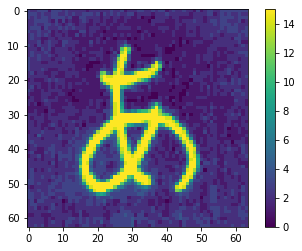

In [202]:
img = np.array(Image.frombytes('F', (WIDTH, HEIGHT), df['image_data'][0], 'bit', 4))
plt.imshow(img)
plt.colorbar()
plt.show()

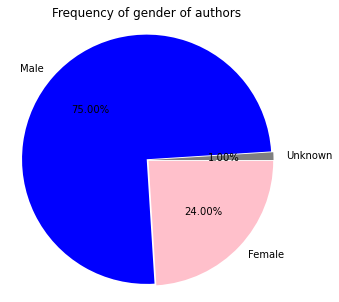

In [193]:
fig, ax = plt.subplots( figsize = (5,5))

sizes = df.groupby(by='writer_gender')['writer_gender'].count().values
labels = ['Unknown', 'Male', 'Female']
explode = (0.01, 0.01, 0.01)
colors = ['grey', 'blue', 'pink']


ax.pie(
    sizes, 
    explode = explode, 
    labels = labels, 
    colors = colors, 
    autopct='%1.2f%%',
)

ax.axis('equal')
plt.title("Frequency of gender of authors")
plt.show()

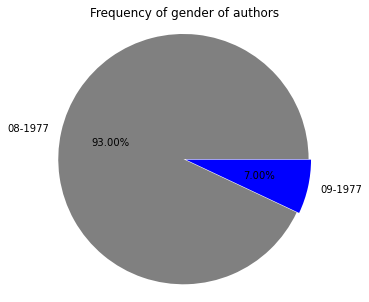

In [200]:
fig, ax = plt.subplots( figsize = (5,5))

sizes = df.groupby(by='date_of_scan')['date_of_scan'].count().values
labels = df.groupby(by='date_of_scan')['date_of_scan'].count().index
explode = (0.01, 0.01)


ax.pie(
    sizes, 
    explode = explode, 
    labels = labels, 
    colors = colors, 
    autopct='%1.2f%%',
)

ax.axis('equal')
plt.title("Frequency of gender of authors")
plt.show()

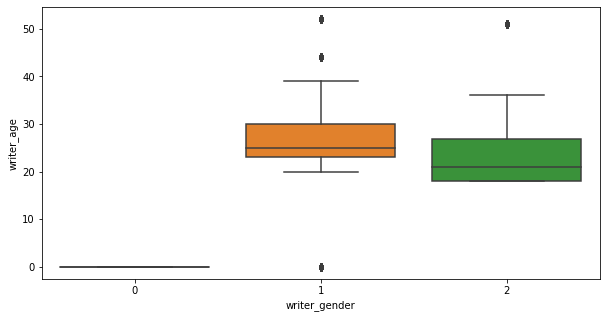

In [207]:
fig, ax = plt.subplots( figsize = (10, 5))

sns.boxplot(x="writer_gender", y="writer_age", ax = ax, data=df, showfliers=True);